# Marketing Campaign Analysis
**Cel projektu:** Analiza rzeczywistych danych marketingowych w celu optymalizacji budżetu. Projekt obejmuje czyszczenie danych (Data Cleaning), inżynierię cech (wyliczenie wskaźników CTR i CPC) oraz segmentację klientów pod kątem najwyższego zwrotu z inwestycji (ROI).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

df = pd.read_csv("data/marketing_data.csv")

display(df.head())

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


In [3]:
print("Typy przed czyszczeniem:\n", df.dtypes, "\n")

if df["Acquisition_Cost"].dtype == 'O': 
    df["Acquisition_Cost"] = df["Acquisition_Cost"].str.replace("$", "", regex=False)
    df["Acquisition_Cost"] = df["Acquisition_Cost"].str.replace(",", "", regex=False)
    df["Acquisition_Cost"] = df["Acquisition_Cost"].astype(float)

df["Date"] = pd.to_datetime(df["Date"])

print("Typy po czyszczeniu:\n", df.dtypes)

Typy przed czyszczeniem:
 Campaign_ID           int64
Company                 str
Campaign_Type           str
Target_Audience         str
Duration                str
Channel_Used            str
Conversion_Rate     float64
Acquisition_Cost        str
ROI                 float64
Location                str
Language                str
Clicks                int64
Impressions           int64
Engagement_Score      int64
Customer_Segment        str
Date                    str
dtype: object 

Typy po czyszczeniu:
 Campaign_ID                  int64
Company                        str
Campaign_Type                  str
Target_Audience                str
Duration                       str
Channel_Used                   str
Conversion_Rate            float64
Acquisition_Cost               str
ROI                        float64
Location                       str
Language                       str
Clicks                       int64
Impressions                  int64
Engagement_Score             int6

In [6]:
df["CTR"] = df["Clicks"] / df["Impressions"]
df["CPC"] = df["Acquisition_Cost"] / df["Clicks"]

display(df[["CTR", "CPC", "Conversion_Rate", "ROI"]].describe())

,CTR,CPC,Conversion_Rate,ROI
count,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.140405,32.008490,0.080070,5.002438
std,0.130881,26.926121,0.040602,1.734488
min,0.010054,5.021084,0.010000,2.000000
25%,0.058606,15.091967,0.050000,3.500000
50%,0.099789,22.774008,0.080000,5.010000
75%,0.169699,38.599088,0.120000,6.510000
max,0.992024,199.960000,0.150000,8.000000


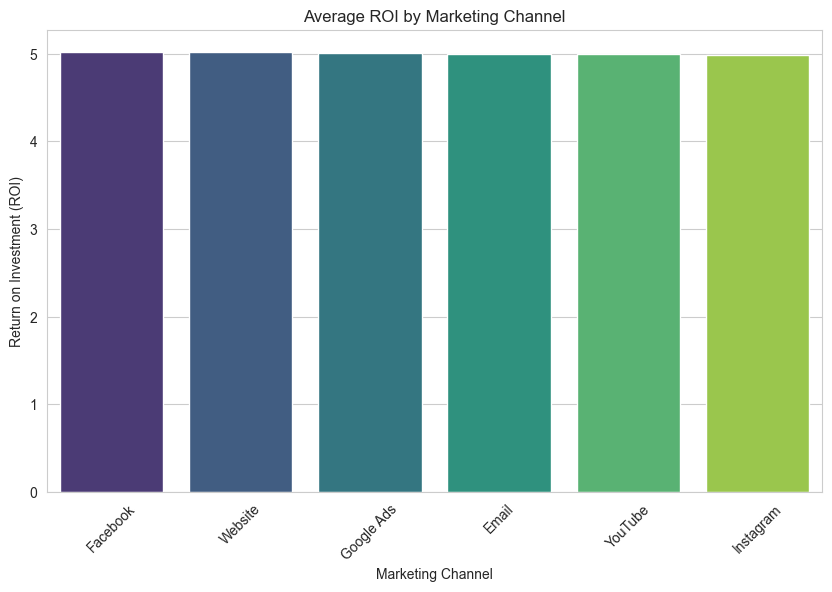

,Channel_Used,ROI,Acquisition_Cost
1,Facebook,5.018699,410595258.0
4,Website,5.014167,416593500.0
2,Google Ads,5.003141,418912314.0
0,Email,4.996487,420874104.0
5,YouTube,4.993754,416778582.0
3,Instagram,4.988706,417124850.0


In [10]:
channel_summary = df.groupby("Channel_Used").agg({
    "ROI": "mean",
    "Acquisition_Cost": "sum"
}).reset_index().sort_values("ROI", ascending=False)

sns.barplot(data=channel_summary, x="Channel_Used", y="ROI", palette="viridis", hue="Channel_Used", legend=False)
plt.title("Average ROI by Marketing Channel")
plt.ylabel("Return on Investment (ROI)")
plt.xlabel("Marketing Channel")
plt.xticks(rotation=45)
plt.show()

display(channel_summary)

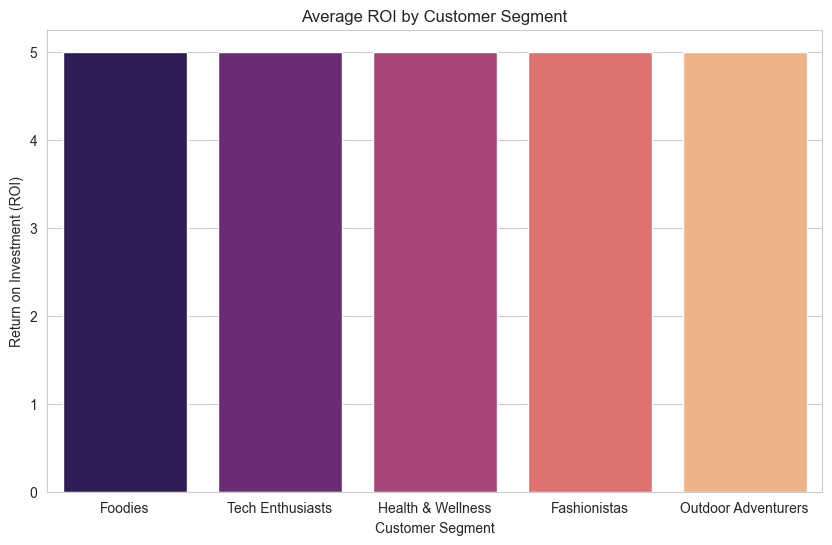

In [9]:
segment_summary = df.groupby("Customer_Segment")["ROI"].mean().sort_values(ascending=False).reset_index()

sns.barplot(data=segment_summary, x="Customer_Segment", y="ROI", palette="magma", hue="Customer_Segment", legend=False)
plt.title("Average ROI by Customer Segment")
plt.ylabel("Return on Investment (ROI)")
plt.xlabel("Customer Segment")
plt.show()

## Wnioski i Rekomendacje Biznesowe

1. **Optymalizacja Kanałów:** Najwyższy średni zwrot z inwestycji (ROI) generuje kanał **Facebook**. Z kolei najsłabiej performującym kanałem w analizowanym okresie okazał się **Instagram**. Rekomenduję testowe przesunięcie 10-15% budżetu z Instagrama na Facebooka i obserwację, czy trend wzrostowy się utrzyma.
2. **Targetowanie Odbiorców:** Segment klientów z grupy **Foodies** (tuż obok Tech Enthusiasts) osiąga najwyższe ROI. Działania marketingowe i kreacje reklamowe w kolejnym kwartale powinny być silniej personalizowane pod tę konkretną grupę docelową.
3. **Obserwacja analityczna:** Warto zauważyć, że wariancja ROI między kanałami i segmentami jest bardzo niska (wyniki oscylują w wąskim przedziale 4.98 - 5.02). Sugeruje to wysoką stabilność działań marketingowych lub osiągnięcie "sufitu" optymalizacyjnego dla obecnych kreacji reklamowych.